# データの準備

花のアヤメのデータを使う。以下3種類（クラス/分類）がある。<br>
Iris-setosa (n=50)<br>
Iris-versicolor (n=50)<br>
Iris-virginica (n=50)<br>

説明変数は４つ<br>
萼片（sepal）の長さ（cm）<br>
萼片（sepal）の幅（cm）<br>
花びら（petal）の長さ（cm）<br>
花びら（petal）の幅（cm）

最も基本的な多クラス分類の考え方は、「1対その他（one vs all, one vs rest）」

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn.datasets import load_iris

iris = load_iris() # データの読み込み
X = iris.data # 説明変数
Y = iris.target #目的変数
print(iris.DESCR) # 説明文

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [6]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
#使いやすいようにDataFrameに変換する
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width'
                                 ,'Petal Length','Petal Width'])
iris_target = DataFrame(Y,columns=['Species'])

In [8]:
#クラス0,1,2に文字列の名前をつけておく
def flower(num):
    ''' 数字を受け取って、対応する名前を返します。'''
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

iris_target['Species'] = iris_target['Species'].apply(flower)

In [9]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [10]:
# 説明変数と目的変数をまとめておく
iris = pd.concat([iris_data,iris_target],axis=1)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# データの可視化

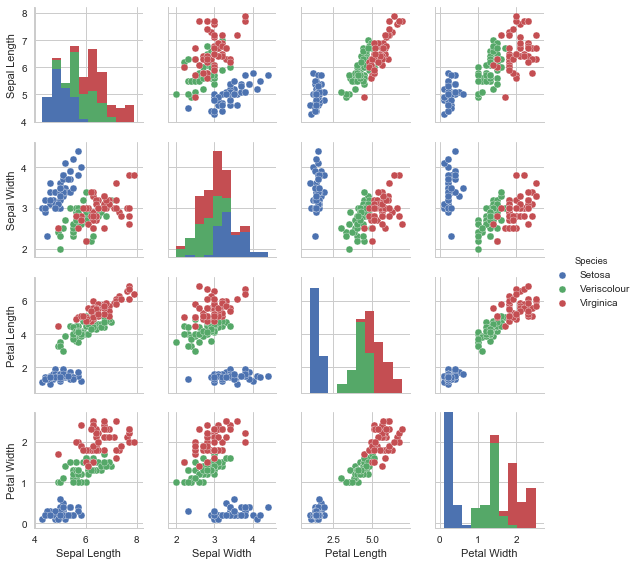

In [11]:
sns.pairplot(iris,hue='Species',size=2)

↑特徴によって良く分かれている。（特にSetosa）

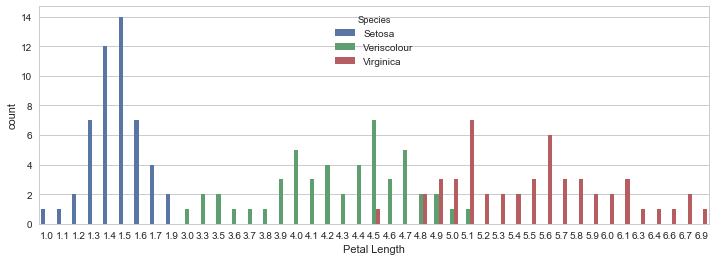

In [12]:
#花びらの長さに注目
plt.figure(figsize=(12,4))
sns.countplot('Petal Length',data=iris,hue='Species')

# scikit-learnを使った多クラス分類

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression() #インスタンス作成

# テストが全体の40%になるように分割（デフォルトは30%）
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.4,random_state=3)
# データを使って学習します。
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
from sklearn import metrics

Y_pred = logreg.predict(X_test) # テストデータを予測
print(metrics.accuracy_score(Y_test,Y_pred)) # 精度を計算

0.933333333333


↑93%と高い精度

# K近傍法(k-nearest neighbor,kNN)

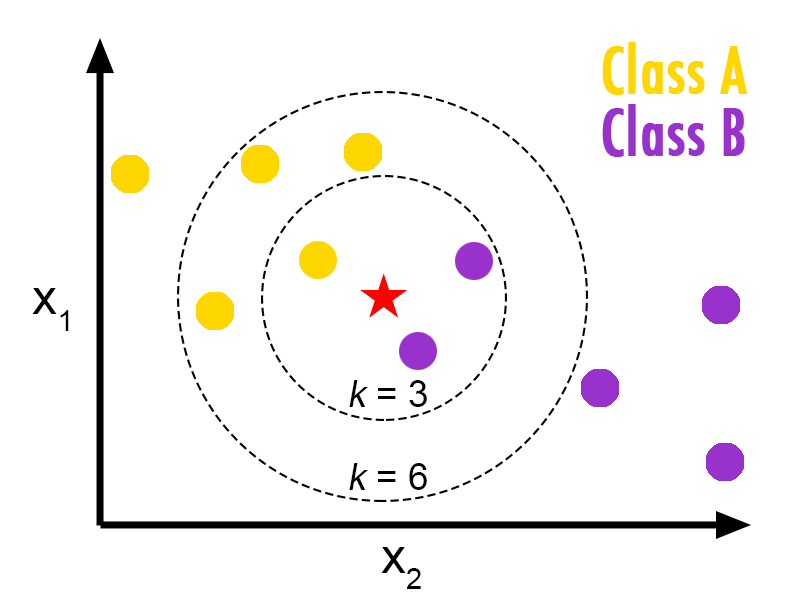

In [17]:
from IPython.display import Image
Image('http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png',width=400, height=300)

↑K=3だったら、星は、Bのほうが多いのでBになる

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# k=6でインスタンス作成
knn = KNeighborsClassifier(n_neighbors = 6)
# 学習
knn.fit(X_train,Y_train)
# テストデータを予測
Y_pred = knn.predict(X_test)
# 精度を確認
print(metrics.accuracy_score(Y_test,Y_pred))

0.95


In [19]:
# K=1の場合
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

0.966666666667


In [20]:
# kを変化をプロットしてみる
k_range = range(1, 90)
accuracy = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

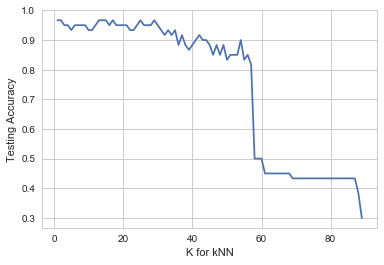

In [21]:
plt.plot(k_range, accuracy)
plt.xlabel('K for kNN')
plt.ylabel('Testing Accuracy')